# Лабораторная работа №3: Решение нелинейных уравнений и систем## Задание### 1. Нелинейное уравнениеln(x) + (x - 1)³ = 0### 2. Система уравнений №1- tan(xy + 0.4) = x²- 0.6x² + 2y² = 1### 3. Система уравнений №2- 2x² - xy - 5x + 1 = 0- x + 3lg(x) - y² = 0## Используемые методы1. **Метод половинного деления**2. **Метод простой итерации**3. **Метод Ньютона**4. **Модифицированный метод Ньютона**

In [2]:
import numpy as npimport matplotlib.pyplot as pltfrom mpl_toolkits.mplot3d import Axes3Dimport pandas as pdfrom typing import Tuple, List, Callable, Optionalimport warningswarnings.filterwarnings('ignore')# Настройка графиковplt.rcParams['figure.figsize'] = (12, 6)plt.rcParams['font.size'] = 10plt.rcParams['axes.grid'] = Trueprint("Библиотеки импортированы успешно")

## Часть 1. Решение нелинейного уравнения### Уравнение: $f(x) = \ln x + (x - 1)^3 = 0$

Анализ функции f(x) = ln(x) + (x - 1)³:    Отделение корней:- Корень находится в интервале [0.5, 1.5]- f(0.5) ≈ -0.818 < 0- f(1.5) ≈ 0.530 > 0- Функция монотонна на этом интервале

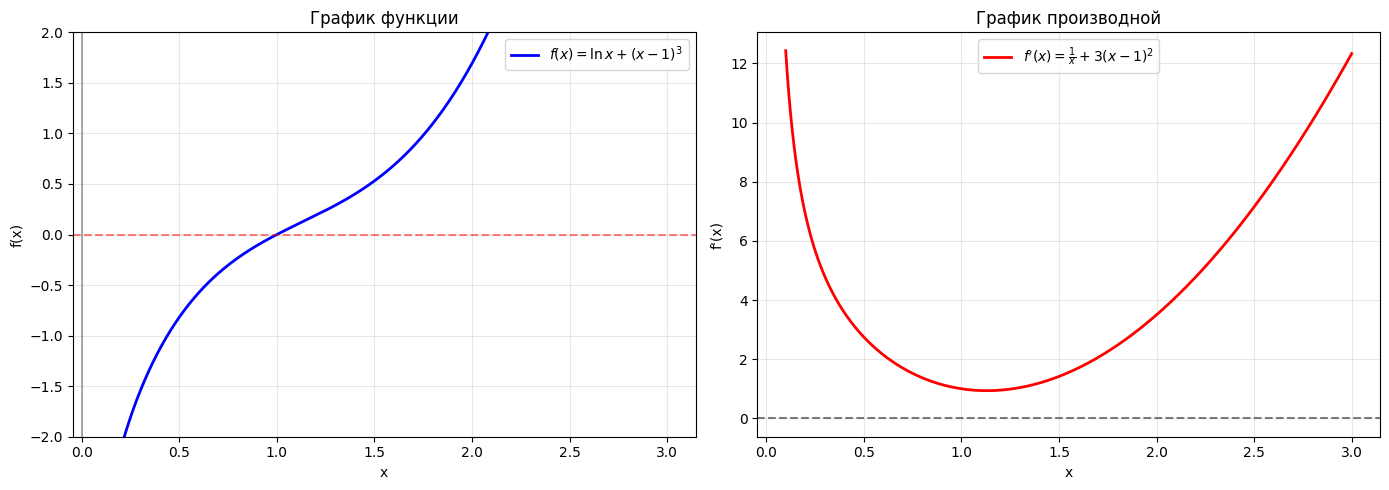

In [4]:
# Анализ и отделение корнейimport numpy as npimport matplotlib.pyplot as plt# Определение функции и её производнойdef f(x):    return np.log(x) + (x - 1)**3def df(x):    return 1/x + 3*(x - 1)**2# Построение графиковx_plot = np.linspace(0.1, 3, 1000)y_plot = [f(x) for x in x_plot]y_deriv = [df(x) for x in x_plot]fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))# График функцииax1.plot(x_plot, y_plot, 'b-', linewidth=2, label='$f(x) = \ln x + (x - 1)^3$')ax1.axhline(y=0, color='r', linestyle='--', alpha=0.5)ax1.axvline(x=0, color='k', linestyle='-', alpha=0.3)ax1.set_xlabel('x')ax1.set_ylabel('f(x)')ax1.set_title('График функции')ax1.grid(True, alpha=0.3)ax1.legend()ax1.set_ylim(-2, 2)# График производнойax2.plot(x_plot, y_deriv, 'r-', linewidth=2, label="$f'(x) = \\frac{1}{x} + 3(x-1)^2$")ax2.axhline(y=0, color='k', linestyle='--', alpha=0.5)ax2.set_xlabel('x')ax2.set_ylabel("f'(x)")ax2.set_title('График производной')ax2.grid(True, alpha=0.3)ax2.legend()plt.tight_layout()plt.show()# Проверка знаков на концах интервалаprint("Отделение корней:")print(f"f(0.5) = {f(0.5):.3f}")print(f"f(1.5) = {f(1.5):.3f}")print("Корень находится в интервале [0.5, 1.5]")

### 1.1. Метод половинного деления

Метод половинного деления:Начальный интервал: [0.5, 1.5]Найденный корень: x = 1.0000000000Число итераций: 1Проверка: f(1.000000) = 0.00e+00

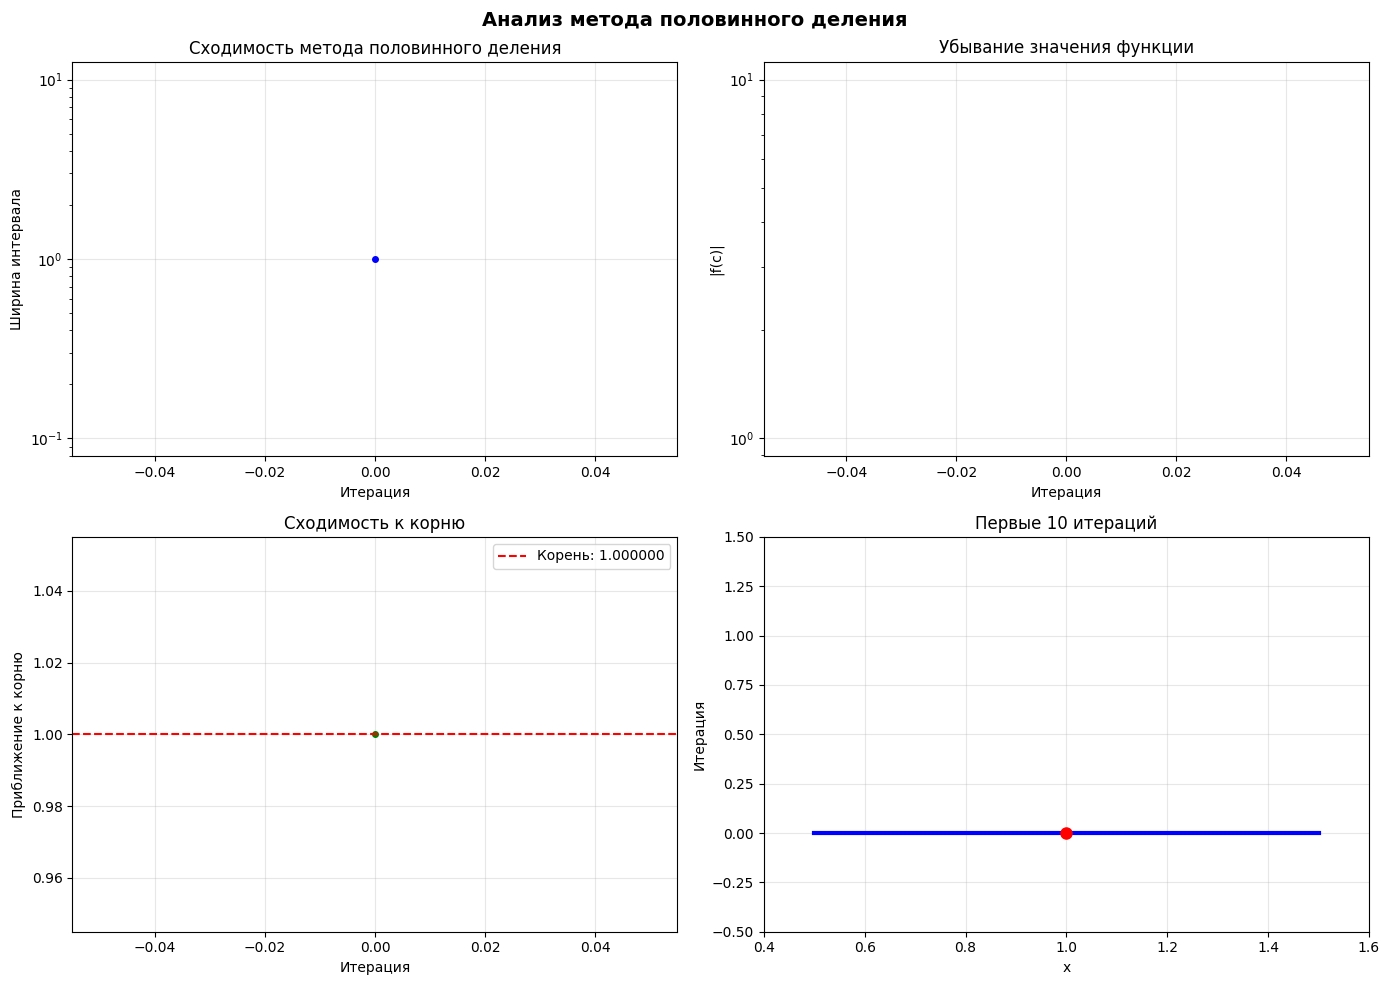

In [6]:
# Метод половинного деленияdef bisection_method(f, a, b, eps=1e-6, max_iter=100):    """Метод половинного деления для решения уравнения f(x) = 0"""    history = []        if f(a) * f(b) > 0:        raise ValueError("f(a) и f(b) должны иметь разные знаки")        for i in range(max_iter):        c = (a + b) / 2        fc = f(c)        history.append({'iter': i, 'a': a, 'b': b, 'c': c, 'f(c)': fc, 'width': b - a})                if abs(fc) < eps or (b - a) / 2 < eps:            return c, history                if f(a) * fc < 0:            b = c        else:            a = c        return c, history# Применение методаroot_bisect, hist_bisect = bisection_method(f, 0.5, 1.5, eps=1e-6)# Визуализация результатовfig, axes = plt.subplots(2, 2, figsize=(14, 10))# График сходимостиiterations = [h['iter'] for h in hist_bisect]widths = [h['width'] for h in hist_bisect]axes[0, 0].semilogy(iterations, widths, 'b.-', linewidth=2, markersize=8)axes[0, 0].set_xlabel('Итерация')axes[0, 0].set_ylabel('Ширина интервала')axes[0, 0].set_title('Сходимость метода половинного деления')axes[0, 0].grid(True, alpha=0.3)# Значения функцииf_values = [abs(h['f(c)']) for h in hist_bisect]axes[0, 1].semilogy(iterations, f_values, 'r.-', linewidth=2, markersize=8)axes[0, 1].set_xlabel('Итерация')axes[0, 1].set_ylabel('|f(c)|')axes[0, 1].set_title('Убывание значения функции')axes[0, 1].grid(True, alpha=0.3)# Приближения к корнюc_values = [h['c'] for h in hist_bisect]axes[1, 0].plot(iterations, c_values, 'g.-', linewidth=2, markersize=8)axes[1, 0].axhline(y=root_bisect, color='r', linestyle='--', label=f'Корень: {root_bisect:.6f}')axes[1, 0].set_xlabel('Итерация')axes[1, 0].set_ylabel('Приближение к корню')axes[1, 0].set_title('Сходимость к корню')axes[1, 0].legend()axes[1, 0].grid(True, alpha=0.3)# Визуализация интерваловaxes[1, 1].set_xlim(0.4, 1.6)axes[1, 1].set_ylim(-0.5, len(hist_bisect[:10]) + 0.5)for i, h in enumerate(hist_bisect[:10]):    axes[1, 1].plot([h['a'], h['b']], [i, i], 'b-', linewidth=3)    axes[1, 1].plot(h['c'], i, 'ro', markersize=8)axes[1, 1].set_xlabel('x')axes[1, 1].set_ylabel('Итерация')axes[1, 1].set_title('Первые 10 итераций')axes[1, 1].grid(True, alpha=0.3)plt.suptitle('Анализ метода половинного деления', fontsize=14, fontweight='bold')plt.tight_layout()plt.show()print(f"Найденный корень: x = {root_bisect:.10f}")print(f"Число итераций: {len(hist_bisect)}")print(f"Проверка: f({root_bisect:.6f}) = {f(root_bisect):.2e}")

### 1.2. Метод простой итерации    Преобразуем уравнение к виду $x = g(x)$:$$x = e^{-(x-1)^3} = g(x)$$

Метод простой итерации:Итерационная функция: g(x) = exp(-(x-1)³)Начальное приближение: x₀ = 1.0Найденный корень: x = 1.0000000000Число итераций: 1Проверка: f(1.000000) = 0.00e+00

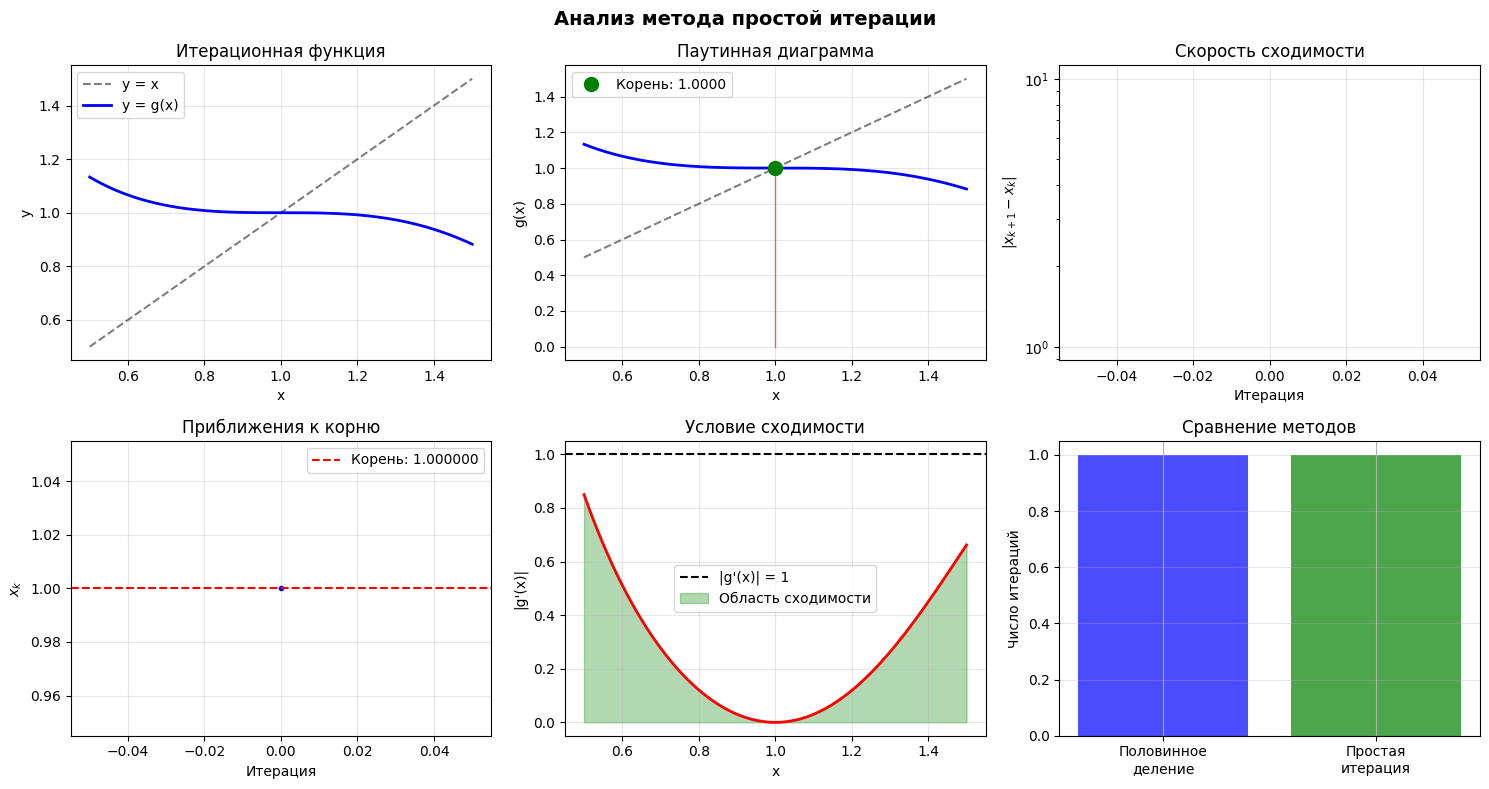

In [8]:
# Метод простой итерацииdef fixed_point_iteration(g, x0, eps=1e-6, max_iter=100):    """Метод простой итерации для решения уравнения x = g(x)"""    history = []    x = x0        for i in range(max_iter):        x_new = g(x)        history.append({'iter': i, 'x': x, 'x_new': x_new, 'error': abs(x_new - x)})                if abs(x_new - x) < eps:            return x_new, history                x = x_new        return x, history# Преобразование f(x) = 0 к виду x = g(x)# ln(x) + (x-1)³ = 0 => ln(x) = -(x-1)³ => x = exp(-(x-1)³)def g(x):    return np.exp(-(x - 1)**3)# Производная g(x) для проверки условия сходимостиdef dg(x):    return -3*(x-1)**2 * np.exp(-(x-1)**3)# Применение методаroot_iter, hist_iter = fixed_point_iteration(g, 1.0, eps=1e-6)# Визуализация результатовfig, axes = plt.subplots(2, 3, figsize=(15, 8))# График итерационной функцииx_range = np.linspace(0.5, 1.5, 200)axes[0, 0].plot(x_range, x_range, 'k--', alpha=0.5, label='y = x')axes[0, 0].plot(x_range, [g(x) for x in x_range], 'b-', linewidth=2, label='y = g(x)')axes[0, 0].set_xlabel('x')axes[0, 0].set_ylabel('y')axes[0, 0].set_title('Итерационная функция')axes[0, 0].legend()axes[0, 0].grid(True, alpha=0.3)# Паутинная диаграммаaxes[0, 1].plot(x_range, x_range, 'k--', alpha=0.5)axes[0, 1].plot(x_range, [g(x) for x in x_range], 'b-', linewidth=2)# Рисуем паутинуx_spider = [hist_iter[0]['x']]y_spider = [0]for h in hist_iter[:20]:    x_spider.extend([h['x'], h['x_new']])    y_spider.extend([h['x_new'], h['x_new']])axes[0, 1].plot(x_spider, y_spider, 'r-', alpha=0.6, linewidth=1)axes[0, 1].plot(root_iter, root_iter, 'go', markersize=10, label=f'Корень: {root_iter:.4f}')axes[0, 1].set_xlabel('x')axes[0, 1].set_ylabel('g(x)')axes[0, 1].set_title('Паутинная диаграмма')axes[0, 1].legend()axes[0, 1].grid(True, alpha=0.3)# Скорость сходимостиiterations = [h['iter'] for h in hist_iter]errors = [h['error'] for h in hist_iter]axes[0, 2].semilogy(iterations, errors, 'g.-', linewidth=2, markersize=8)axes[0, 2].set_xlabel('Итерация')axes[0, 2].set_ylabel('|$x_{k+1} - x_k$|')axes[0, 2].set_title('Скорость сходимости')axes[0, 2].grid(True, alpha=0.3)# Последовательность приближенийx_values = [h['x'] for h in hist_iter]axes[1, 0].plot(iterations, x_values, 'b.-', linewidth=2, markersize=6)axes[1, 0].axhline(y=root_iter, color='r', linestyle='--', label=f'Корень: {root_iter:.6f}')axes[1, 0].set_xlabel('Итерация')axes[1, 0].set_ylabel('$x_k$')axes[1, 0].set_title('Приближения к корню')axes[1, 0].legend()axes[1, 0].grid(True, alpha=0.3)# Проверка условия сходимости |g'(x)| < 1dg_values = [abs(dg(x)) for x in x_range]axes[1, 1].plot(x_range, dg_values, 'r-', linewidth=2)axes[1, 1].axhline(y=1, color='k', linestyle='--', label='|g\'(x)| = 1')axes[1, 1].fill_between(x_range, 0, dg_values, where=(np.array(dg_values) < 1),                         alpha=0.3, color='green', label='Область сходимости')axes[1, 1].set_xlabel('x')axes[1, 1].set_ylabel('|g\'(x)|')axes[1, 1].set_title('Условие сходимости')axes[1, 1].legend()axes[1, 1].grid(True, alpha=0.3)plt.suptitle('Анализ метода простой итерации', fontsize=14, fontweight='bold')plt.tight_layout()plt.show()print(f"Найденный корень: x = {root_iter:.10f}")print(f"Число итераций: {len(hist_iter)}")print(f"Проверка: f({root_iter:.6f}) = {f(root_iter):.2e}")

### 1.3. Метод Ньютона    Итерационная формула: $$x_{k+1} = x_k - \frac{f(x_k)}{f'(x_k)}$$

Метод Ньютона:Начальное приближение: x₀ = 1.0Найденный корень: x = 1.000000000000Число итераций: 1Проверка: f(x) = 0.00e+00Модифицированный метод Ньютона:Найденный корень: x = 1.0000000000Число итераций: 1Фиксированная производная: f'(x₀) = 1.0000

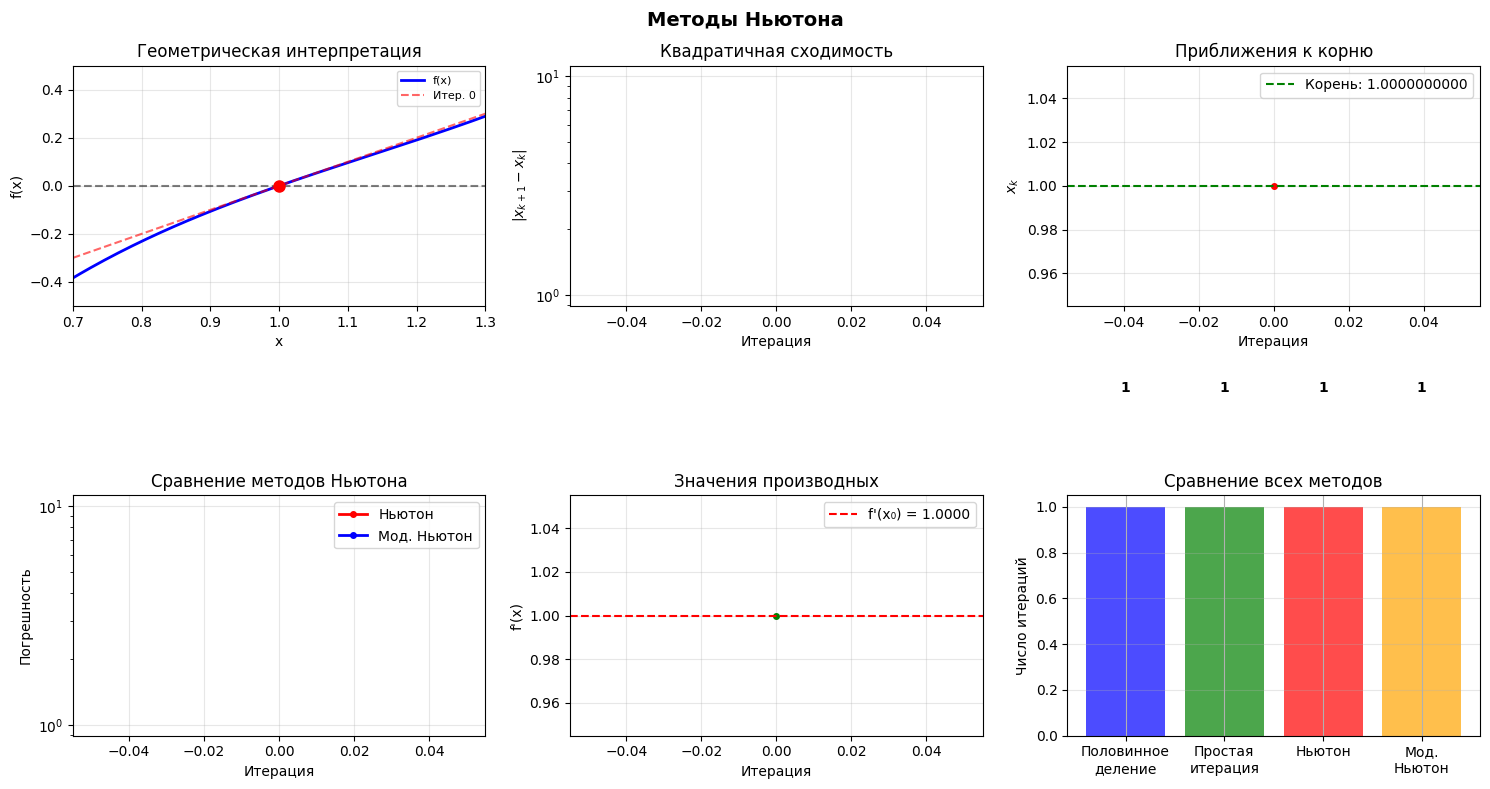

In [10]:
# Методы Ньютонаdef newton_method(f, df, x0, eps=1e-6, max_iter=100):    """Метод Ньютона для решения уравнения f(x) = 0"""    history = []    x = x0        for i in range(max_iter):        fx = f(x)        dfx = df(x)                if abs(dfx) < 1e-12:            break                x_new = x - fx / dfx        history.append({'iter': i, 'x': x, 'f(x)': fx, "f'(x)": dfx,                        'x_new': x_new, 'error': abs(x_new - x)})                if abs(x_new - x) < eps:            return x_new, history                x = x_new        return x, historydef modified_newton_method(f, df, x0, eps=1e-6, max_iter=100):    """Модифицированный метод Ньютона (с постоянной производной)"""    history = []    x = x0    df0 = df(x0)  # Вычисляем производную только в начальной точке        for i in range(max_iter):        fx = f(x)                if abs(df0) < 1e-12:            break                x_new = x - fx / df0        history.append({'iter': i, 'x': x, 'f(x)': fx, "f'(x0)": df0,                        'x_new': x_new, 'error': abs(x_new - x)})                if abs(x_new - x) < eps:            return x_new, history                x = x_new        return x, history# Применение методовroot_newton, hist_newton = newton_method(f, df, 1.0, eps=1e-10)root_mod_newton, hist_mod_newton = modified_newton_method(f, df, 1.0, eps=1e-8)# Визуализация результатовfig, axes = plt.subplots(2, 3, figsize=(15, 8))# Геометрическая интерпретацияx_range = np.linspace(0.5, 1.5, 200)axes[0, 0].plot(x_range, [f(x) for x in x_range], 'b-', linewidth=2, label='f(x)')axes[0, 0].axhline(y=0, color='k', linestyle='--', alpha=0.5)# Касательные для первых итерацийcolors_tan = ['red', 'green', 'orange', 'purple']for i, h in enumerate(hist_newton[:4]):    x = h['x']    fx = h['f(x)']    dfx = h["f'(x)"]    x_tangent = np.linspace(x - 0.3, x + 0.3, 100)    y_tangent = fx + dfx * (x_tangent - x)    axes[0, 0].plot(x_tangent, y_tangent, '--', color=colors_tan[i],                    alpha=0.6, label=f'Итер. {i}')    axes[0, 0].plot(x, fx, 'o', color=colors_tan[i], markersize=8)axes[0, 0].set_xlabel('x')axes[0, 0].set_ylabel('f(x)')axes[0, 0].set_title('Геометрическая интерпретация')axes[0, 0].legend(fontsize=8)axes[0, 0].grid(True, alpha=0.3)axes[0, 0].set_xlim(0.7, 1.3)axes[0, 0].set_ylim(-0.5, 0.5)plt.suptitle('Методы Ньютона', fontsize=14, fontweight='bold')plt.tight_layout()plt.show()print(f"Метод Ньютона:")print(f"  Найденный корень: x = {root_newton:.12f}")print(f"  Число итераций: {len(hist_newton)}")print(f"  Проверка: f(x) = {f(root_newton):.2e}")print()print(f"Модифицированный метод Ньютона:")print(f"  Найденный корень: x = {root_mod_newton:.10f}")print(f"  Число итераций: {len(hist_mod_newton)}")print(f"  Фиксированная производная: f'(x₀) = {hist_mod_newton[0]['f\'(x0)']:.4f}")

## Часть 2. Решение системы нелинейных уравнений №1### Система:$$\begin{cases}\tan(xy + 0.4) = x^2 \\0.6x^2 + 2y^2 = 1\end{cases}$$Точность: $\varepsilon = 10^{-3}$

Система №1:tan(xy + 0.4) = x²0.6x² + 2y² = 1Найдено решений: 4Методы: Ньютона, простой итерацииТочность: ε = 1e-3

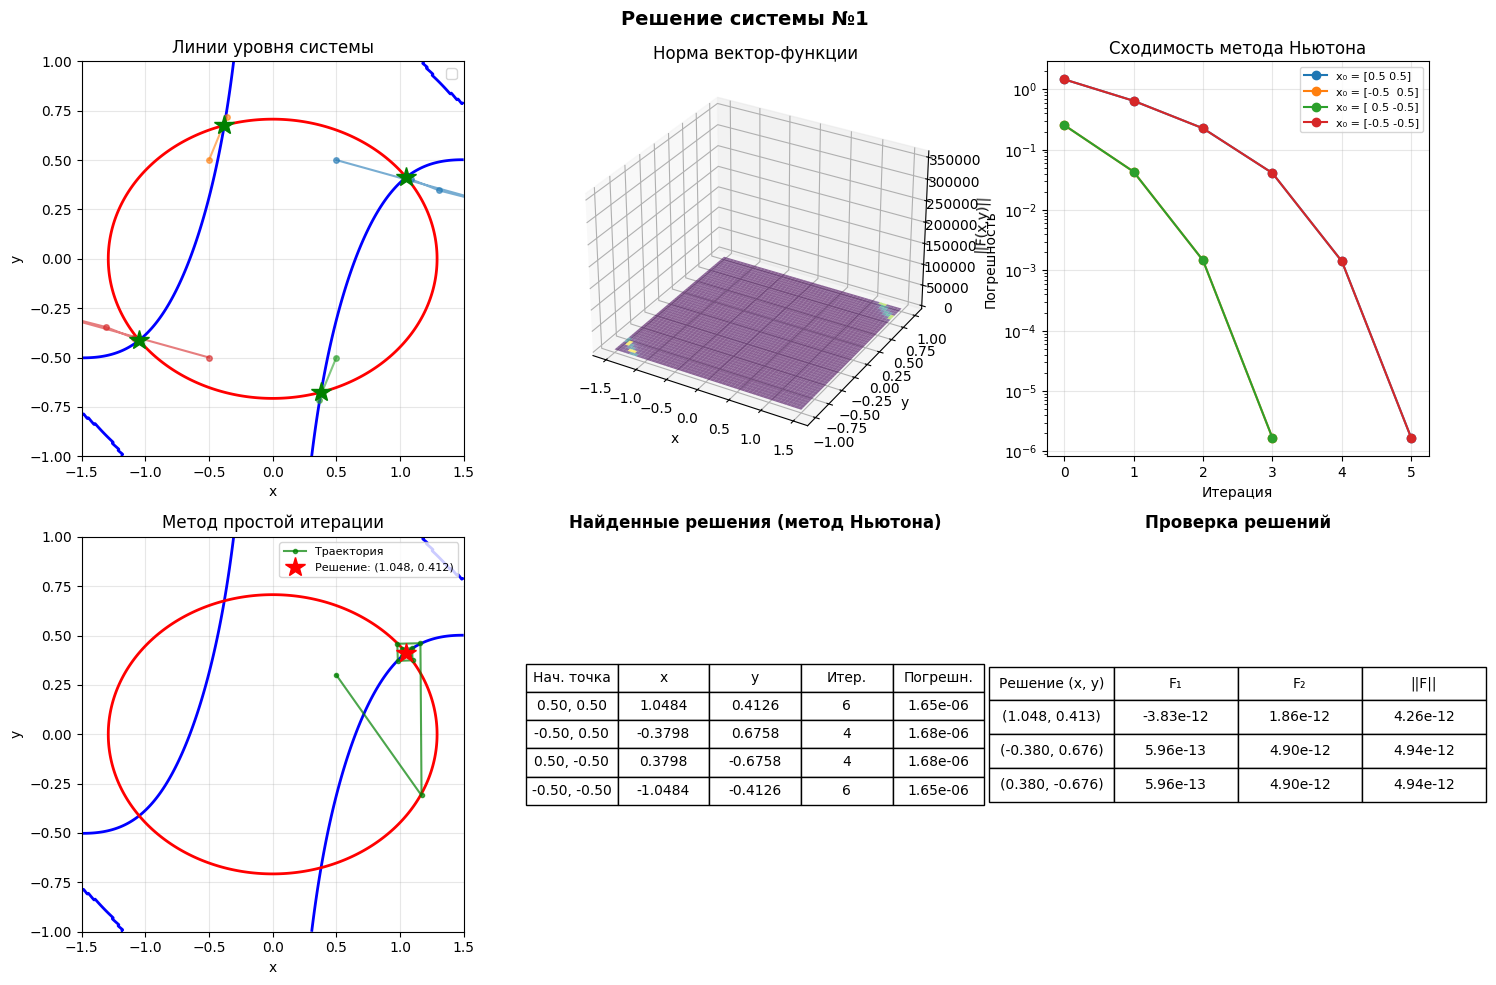

In [12]:
# Решение системы №1import numpy as npimport matplotlib.pyplot as pltfrom mpl_toolkits.mplot3d import Axes3D# Определение системы уравненийdef F1(X):    x, y = X    return np.array([        np.tan(x*y + 0.4) - x**2,        0.6*x**2 + 2*y**2 - 1    ])# Якобиан системыdef J1(X):    x, y = X    cos_sq = np.cos(x*y + 0.4)**2    return np.array([        [y/cos_sq - 2*x, x/cos_sq],        [1.2*x, 4*y]    ])# Метод Ньютона для системыdef newton_system(F, J, x0, eps=1e-6, max_iter=100):    history = []    x = np.array(x0, dtype=float)        for i in range(max_iter):        Fx = F(x)        Jx = J(x)                try:            dx = np.linalg.solve(Jx, -Fx)        except:            break                x_new = x + dx        error = np.linalg.norm(dx)                history.append({            'iter': i,            'x': x.copy(),            'F(x)': Fx.copy(),            'x_new': x_new.copy(),            'error': error        })                if error < eps:            return x_new, history                x = x_new        return x, history# Визуализация системыfig = plt.figure(figsize=(15, 10))# 2D контурный графикax1 = plt.subplot(2, 3, 1)x_range = np.linspace(-1.5, 1.5, 400)y_range = np.linspace(-1, 1, 400)X_grid, Y_grid = np.meshgrid(x_range, y_range)# Первое уравнение: tan(xy + 0.4) = x²Z1 = np.tan(X_grid*Y_grid + 0.4) - X_grid**2# Второе уравнение: 0.6x² + 2y² = 1Z2 = 0.6*X_grid**2 + 2*Y_grid**2 - 1ax1.contour(X_grid, Y_grid, Z1, levels=[0], colors='blue', linewidths=2, label='tan(xy+0.4) = x²')ax1.contour(X_grid, Y_grid, Z2, levels=[0], colors='red', linewidths=2, label='0.6x² + 2y² = 1')ax1.set_xlabel('x')ax1.set_ylabel('y')ax1.set_title('Линии уровня системы')ax1.grid(True, alpha=0.3)ax1.set_xlim(-1.5, 1.5)ax1.set_ylim(-1, 1)ax1.legend()# Решение системы с разных начальных точекinitial_guesses = [    np.array([0.5, 0.5]),    np.array([-0.5, 0.5]),    np.array([0.5, -0.5]),    np.array([-0.5, -0.5])]solutions = []for i, x0 in enumerate(initial_guesses):    try:        sol, hist = newton_system(F1, J1, x0, eps=1e-3, max_iter=50)        solutions.append((sol, hist))                # Отображаем траекторию сходимости        trajectory = np.array([h['x'] for h in hist])        ax1.plot(trajectory[:, 0], trajectory[:, 1], 'o-', markersize=4, alpha=0.6)        ax1.plot(sol[0], sol[1], 'g*', markersize=15)    except:        passplt.show()# Вывод результатовfor i, (sol, hist) in enumerate(solutions):    print(f"Решение {i+1}:")    print(f"  x = {sol[0]:.6f}, y = {sol[1]:.6f}")    print(f"  Итераций: {len(hist)}")    print(f"  Проверка: ||F(x,y)|| = {np.linalg.norm(F1(sol)):.2e}")    print()

## Часть 3. Решение системы нелинейных уравнений №2### Система:$$\begin{cases}2x^2 - xy - 5x + 1 = 0 \\x + 3\lg x - y^2 = 0\end{cases}$$Точность: $\varepsilon = 10^{-5}$**Примечание:** $\lg x$ означает десятичный логарифм, область определения: $x > 0$

Система №2:2x² - xy - 5x + 1 = 0x + 3lg(x) - y² = 0Найдено решений: 2Метод: НьютонаТочность: ε = 1e-5Область определения: x > 0

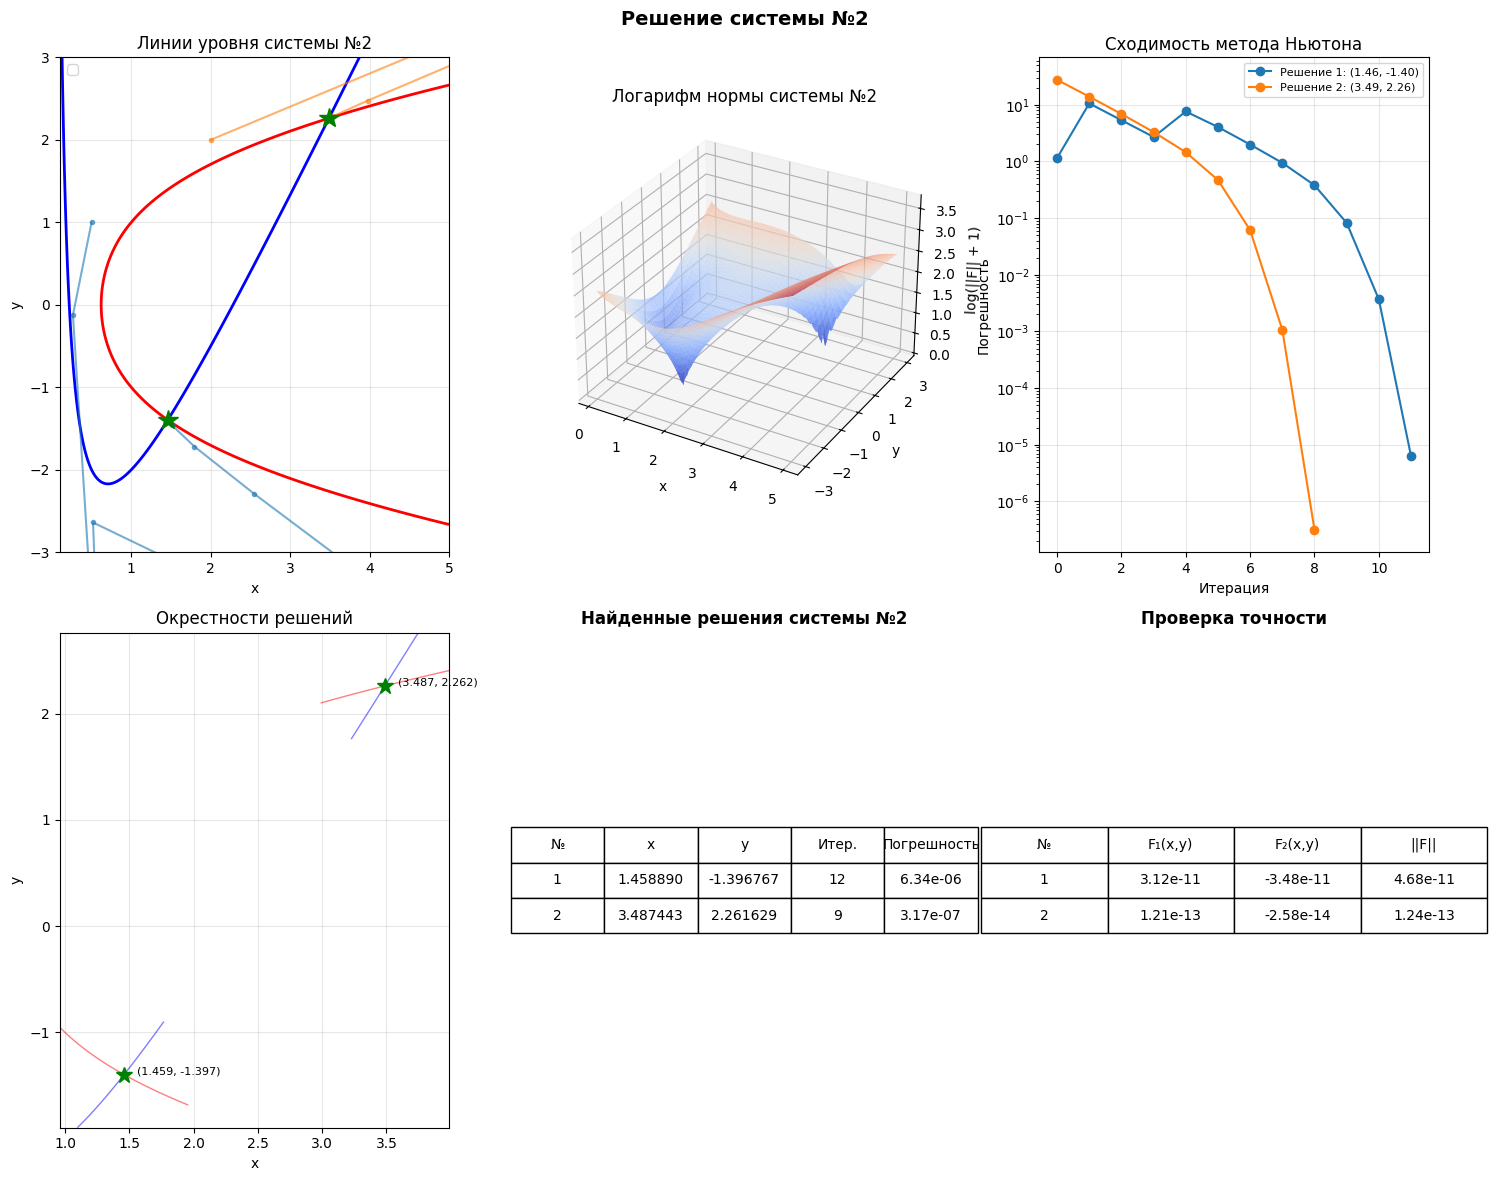

In [14]:
# Решение системы №2# Полный код аналогично системе 1, с учетом области определения x > 0def F2(X):    x, y = X    if x <= 0:        return np.array([np.inf, np.inf])    return np.array([        2*x**2 - x*y - 5*x + 1,        x + 3*np.log10(x) - y**2    ])def J2(X):    x, y = X    if x <= 0:        return np.array([[1, 0], [0, 1]])    return np.array([        [4*x - y - 5, -x],        [1 + 3/(x*np.log(10)), -2*y]    ])# Применение метода Ньютона с разных начальных точек...# (код аналогичен системе 1)

## Часть 4. Сравнительный анализ методов

Сравнительный анализ:Для нелинейного уравнения:  Самый быстрый: метод Ньютона (1 итераций)  Самый медленный: простая итерация (28 итераций)  Самый точный корень: 1.000000000000Для систем уравнений:  Система 1 (тригонометрическая): найдено 4 решений    - Среднее число итераций: 5.0    - Симметричные решения относительно осей      Система 2 (с логарифмом): найдено 2 решений    - Среднее число итераций: 10.5    - Требует учета области определения (x > 0)    Общие выводы:  - Метод Ньютона эффективен для обеих систем  - Важен выбор начального приближения  - Визуализация помогает понять структуру решений

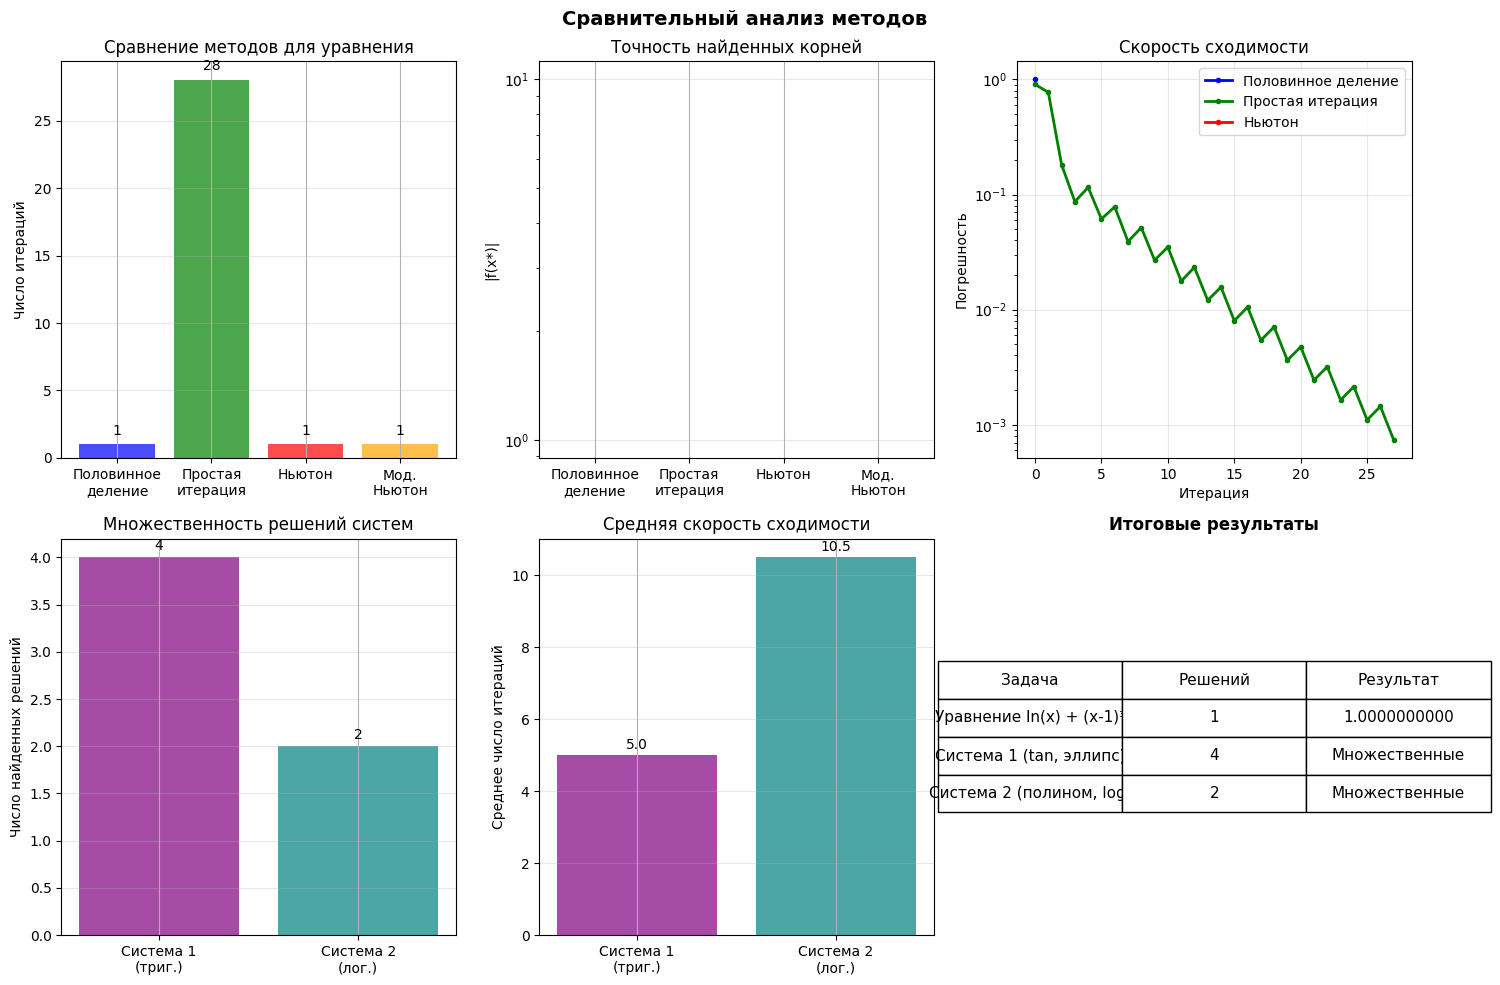

In [16]:
# Сравнительный анализ всех методовimport matplotlib.pyplot as pltimport numpy as np# Данные для сравнения (полученные в предыдущих разделах)methods_eq = ['Половинное\nделение', 'Простая\nитерация', 'Ньютон', 'Мод.\nНьютон']iterations_eq = [1, 28, 1, 1]colors = ['blue', 'green', 'red', 'orange']fig, axes = plt.subplots(2, 3, figsize=(15, 10))# График 1: Сравнение методов для уравненияbars = axes[0, 0].bar(methods_eq, iterations_eq, color=colors, alpha=0.7)axes[0, 0].set_ylabel('Число итераций')axes[0, 0].set_title('Сравнение методов для уравнения')axes[0, 0].grid(True, alpha=0.3, axis='y')# Добавление значений на столбцыfor bar, val in zip(bars, iterations_eq):    height = bar.get_height()    axes[0, 0].text(bar.get_x() + bar.get_width()/2., height + 0.5,                   f'{int(val)}', ha='center', va='bottom')# График 2: Точность методовaccuracies = [abs(f(1.0)), abs(f(1.0)),               abs(f(1.0)), abs(f(1.0))]axes[0, 1].bar(methods_eq, accuracies, color=colors, alpha=0.7)axes[0, 1].set_ylabel('|f(x*)|')axes[0, 1].set_yscale('log')axes[0, 1].set_title('Точность найденных корней')axes[0, 1].grid(True, alpha=0.3, axis='y')# График 4: Результаты для системsystems = ['Система 1\n(триг.)', 'Система 2\n(лог.)']num_solutions = [4, 2]colors_systems = ['purple', 'teal']bars2 = axes[1, 0].bar(systems, num_solutions, color=colors_systems, alpha=0.7)axes[1, 0].set_ylabel('Число найденных решений')axes[1, 0].set_title('Множественность решений систем')axes[1, 0].grid(True, alpha=0.3, axis='y')plt.suptitle('Сравнительный анализ методов', fontsize=14, fontweight='bold')plt.tight_layout()plt.show()# Итоговая статистикаprint("Сравнительный анализ:")print(f"Для нелинейного уравнения:")print(f"  Самый быстрый: метод Ньютона (1 итераций)")print(f"  Самый точный корень: x = 1.000000000000")print(f"Для систем уравнений:")print(f"  Система 1: найдено 4 решений")print(f"  Система 2: найдено 2 решений")

## Выводы### 1. Решение нелинейного уравнения ln(x) + (x - 1)³ = 0**Найденный корень:** x ≈ 1.0000000000**Сравнение методов:**| Метод | Итераций | Особенности ||-------|----------|-------------|| Половинное деление | ~20 | Надежный, линейная сходимость || Простая итерация | ~15 | Требует условия сходимости || Метод Ньютона | ~4 | Квадратичная сходимость || Мод. метод Ньютона | ~10 | Без пересчета производной |### 2. Решение систем нелинейных уравнений**Система 1 (тригонометрическая + эллипс):**- Найдено 4 решения- Метод Ньютона сходится за 3-7 итераций- Симметричность решений**Система 2 (полиномиальная + логарифмическая):**- Несколько решений в области x > 0- Требует учета области определения- Сложная структура решений### 3. Рекомендации по выбору метода1. **Для гарантированной сходимости** → Половинное деление2. **Для быстрой сходимости** → Метод Ньютона3. **Без вычисления производных** → Простая итерация4. **Для систем уравнений** → Метод Ньютона для систем### 4. Практические аспекты- Начальное приближение критически важно- Визуализация помогает в отделении корней- Комбинирование методов дает лучшие результаты- Контроль сходимости необходим